In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
import os
import pandas as pd
from math import floor
import scipy.stats as stats

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

round_error = lambda value,rounder : np.round(value,dcmls(rounder))

def chi2(y,y_err,x,func,popt):
    y_ajuste = func(x,*popt)
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    return chi_cuadrado

def chi2_red(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def pvalue(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    pvalor = stats.chi2.sf(chi_cuadrado,grados_lib)
    return pvalor

In [4]:
from PIL import Image
import imageio.v3 as imageio

In [39]:
#sin recortar en horizontal
#rendija 550 a 720, 5
#sin tecortar en vertical
#largo diametro
#fuerza diametro 840 a 930 2

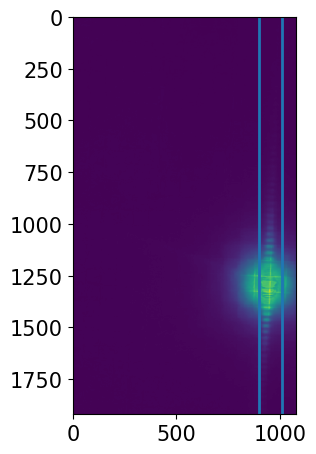

In [68]:
im0 = imageio.imread('images alambre/fuerza diametro/IMG_4539.png')
plt.imshow(im0)
plt.axvline(900)
plt.axvline(1010)
#plt.axhline(500)
#plt.axhline(800)

In [78]:
im1 = Image.open('images alambre/fuerza diametro/IMG_4548.png')

im1 = im1.rotate(3.5)
im1 = im1.crop((900,0,1010,1920))
im1.show()
im1.save('prueba.png')
im1.close()

In [72]:
files

['IMG_4557.png',
 'IMG_4538.png',
 'IMG_4555.png',
 'IMG_4558.png',
 'IMG_4540.png',
 'IMG_4547.png',
 'IMG_4549.png',
 'IMG_4551.png',
 'IMG_4546.png',
 'IMG_4544.png',
 'IMG_4548.png',
 'IMG_4537.png',
 'IMG_4556.png',
 'IMG_4539.png',
 'IMG_4541.png',
 'IMG_4552.png',
 'IMG_4545.png',
 'IMG_4543.png',
 'IMG_4542.png',
 'IMG_4550.png',
 'IMG_4554.png',
 'IMG_4553.png']

In [73]:
files = os.listdir('images alambre/fuerza diametro')
im1 = Image.open(f'images alambre/fuerza diametro/IMG_4537.png')
im1 = im1.rotate(2)
im1 = im1.crop((840,0,930,1920))
im1.save(f'images alambre/cropped/fuerza diametro/IMG_4537.png')
im1.close()
for file in files:
    if file == 'IMG_4537.png':
        continue
    im1 = Image.open(f'images alambre/fuerza diametro/{file}')
    im1 = im1.rotate(2)
    im1 = im1.crop((900,0,1010,1920))
#    im1.show()
    im1.save(f'images alambre/cropped/fuerza diametro/{file}')
    im1.close()

In [91]:
im1 = Image.open(f'images alambre/calibración.png')
im1 = im1.rotate(2)
#im1 = im1.crop((840,0,930,1920))
im1.save(f'images alambre/cropped/cal fuerza.png')
im1.close()

In [149]:
pesas = {'gancho':1.6945,'soporte largo':116.7438,'grande alta':45.2848,'grande baja':33.8058,'dorada grande':154.2692,'dorada chica':97.5840,'105':100.2016,
         'cuadrada':163.7749,'6':97.5937,'7':195.1613,'cinta':154.9933,'negra':185.9034,'3 negros':241.0434,'kg':988.5,'500':499.4,'dólares':999.2,'B':1000.3,
         'marrón':1000.7,'cuadrado grande':0} # gramos

pesos = np.array([0,
                  pesas['grande alta'],
                  pesas['grande alta']+pesas['grande baja'],
                  pesas['grande alta']+pesas['grande baja']+pesas['dorada chica'],
                  pesas['grande alta']+pesas['grande baja']+pesas['dorada chica']+pesas['105'],
                  pesas['grande alta']+pesas['grande baja']+pesas['dorada chica']+pesas['dorada grande'],
                  pesas['grande alta']+pesas['grande baja']+pesas['dorada chica']+pesas['6'],
                  pesas['grande alta']+pesas['grande baja']+pesas['6']+pesas['7'],
                  pesas['grande alta']+pesas['grande baja']+pesas['6']+pesas['7']+pesas['dorada grande'],
                  pesas['grande alta']+pesas['grande baja']+pesas['6']+pesas['7']+pesas['dorada grande']+pesas['dorada chica'],
                  pesas['grande alta']+pesas['grande baja']+pesas['6']+pesas['7']+pesas['dorada grande']+pesas['dorada chica']+pesas['105'],
                  pesas['grande alta']+pesas['grande baja']+pesas['6']+pesas['7']+pesas['dorada grande']+pesas['dorada chica']+pesas['105']+pesas['cuadrada'],
                  pesas['grande alta']+pesas['grande baja']+pesas['6']+pesas['7']+pesas['dorada grande']+pesas['dorada chica']+pesas['105']+pesas['cuadrada']+pesas['negra'],
                  pesas['500']+pesas['negra'],
                  pesas['500']+pesas['cinta'],
                  pesas['kg'],
                  pesas['kg']+pesas['500'],
                  pesas['kg']+pesas['500']+pesas['cuadrado grande'],
                  pesas['kg']+pesas['500']+pesas['cuadrado grande']+pesas['negra']+pesas['3 negros'],
                  pesas['kg']+pesas['dólares'],
                  pesas['kg']+pesas['dólares']+pesas['B'],
                  pesas['kg']+pesas['dólares']+pesas['B']+pesas['marrón']                  
    ]) + pesas['gancho']+pesas['soporte largo']
len(pesos)

22

In [152]:
imagen = imageio.imread('images alambre/cropped/fuerza diametro/IMG_4537.png').transpose()

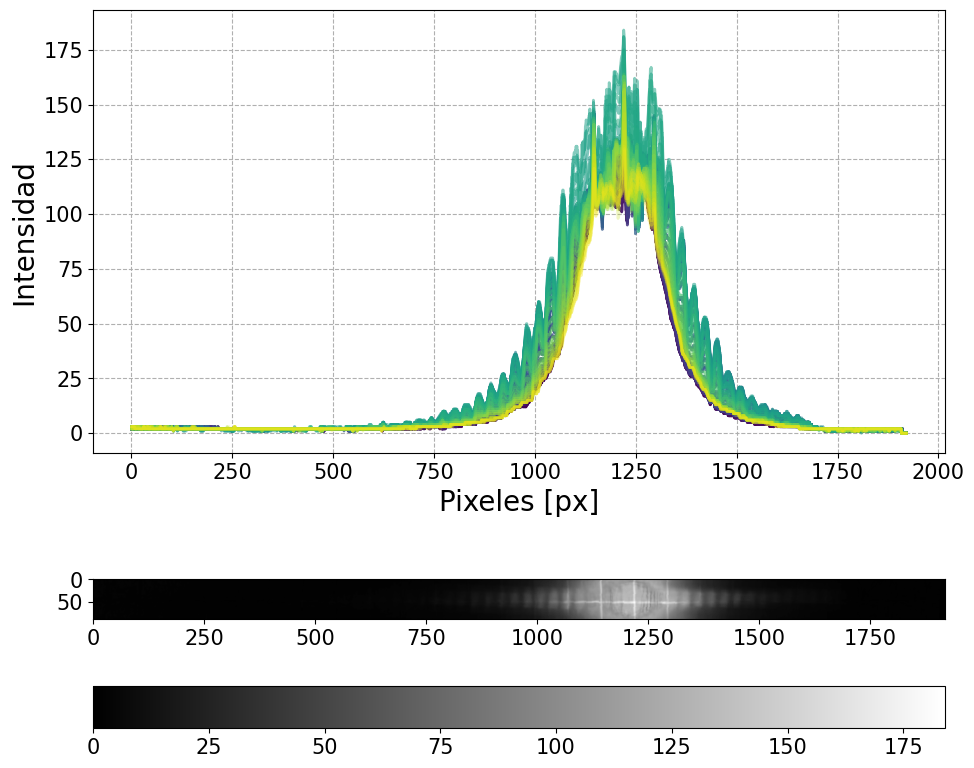

In [81]:
dom = np.array(range(1, max(imagen.shape)+1)) 
# mappable = plt.imshow([imagen[0]], cmap='viridis')
plt.figure(figsize=[10,8])
plt.subplot(2, 1, 1)  # Dos filas, una columna, primer gráfico
a = 1
for i in range(len(imagen)):
    plt.plot(dom, imagen[i, :], c=plt.cm.viridis(i / len(imagen)), label=f'Fila {i}', alpha=a)
    a = a - 0.8/min(imagen.shape)
#    a = a - 0.005
# Añadir una barra de colores para mostrar la correspondencia entre valores y colores
plt.xlabel('Pixeles [px]', fontsize='20')
plt.ylabel('Intensidad', fontsize='20')
#plt.xlim(300,1100)
plt.grid(linestyle='--')

# Segundo gráfico
plt.subplot(2, 1, 2)  # Dos filas, una columna, segundo gráfico
plt.imshow(imagen, cmap='gray')
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.invert_yaxis()

plt.tight_layout()  # Ajusta automáticamente el espaciado entre los gráficos para evitar solapamientos
plt.show()

In [82]:
from scipy import signal
from scipy.fft import fft

In [83]:
def espectro(y, altura, key,N):
    fft_result = fft(y)
    
    frec = np.arange(1,N//2)/(N)
    spec = np.abs(fft_result[1:N//2])/N
    
    if key==True:
        # Encuentra el índice más cercano al valor de frecuencia 0.04
        idx = np.argmin(np.abs(frec - 0.04))
        # Busca picos a partir de este índice
        picos, _ = signal.find_peaks(spec[idx:], height=altura, distance=5)
        # Ajusta los índices de los picos para que correspondan a los índices en spec original
        picos += idx
    else:
        picos, _ = signal.find_peaks(spec, height = altura, distance = 5)

     
    return frec, spec, picos

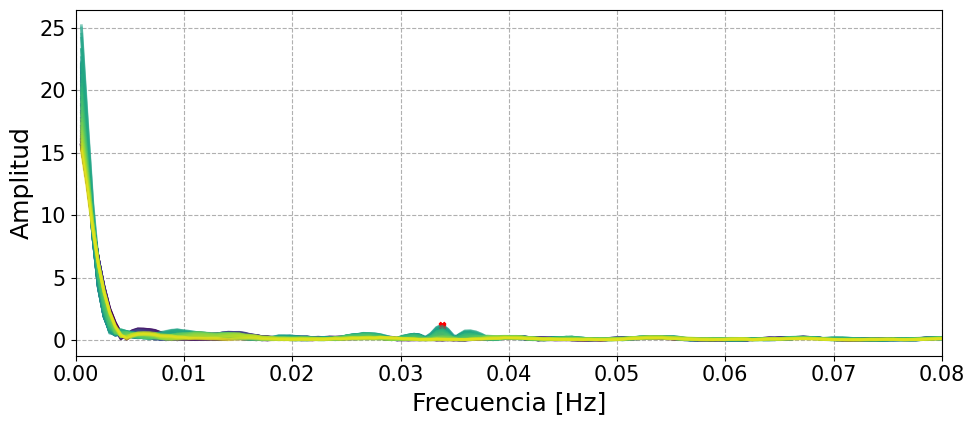

In [153]:
maximos = [] 
a=1
plt.figure(figsize=[10,4.5])
for i in range(min(imagen.shape)):
    frec, spec, picos = espectro(imagen[i, :], 1,False,max(imagen.shape))
    
    plt.scatter(frec[picos], spec[picos], marker='x', c='r', zorder=2)
    plt.plot(frec, spec, color = plt.cm.viridis(i/len(imagen)), label=f'Fila {i}', alpha=a)
    a = a - 0.8/min(imagen.shape)
    
    if len(picos) > 0:
        maximos.append(np.mean(frec[picos]))
plt.xlabel('Frecuencia [1/px]', fontsize=18)
plt.ylabel('Amplitud', fontsize=18)
plt.xlim(0,.08)
plt.grid(linestyle='--')
plt.show()

In [157]:
px_to_cm(1/np.array(maximos))

array([1079.85798817, 1079.85798817, 1079.85798817, 1079.85798817,
       1079.85798817, 1079.85798817, 1079.85798817])

In [142]:
np.arange(1,5,1)

array([1, 2, 3, 4])

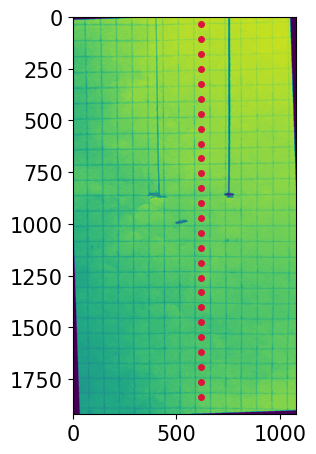

In [238]:
imagen = imageio.imread('images alambre/cropped/cal fuerza.png')[:,:,0]
plt.imshow(imagen)
#plt.axvline(350)
#plt.axvline(460)
#plt.axvline(480)
#plt.axvline(560)
#plt.axvline(710)
#plt.axvline(790)
#plt.axhline(20)
ys = 36 + np.arange(0,26)*71.92307692307692
plt.scatter(np.zeros(26)+620,ys,c='crimson',zorder=3)

(1920, 810)
1870
(1920, 810)
(1870, 720)


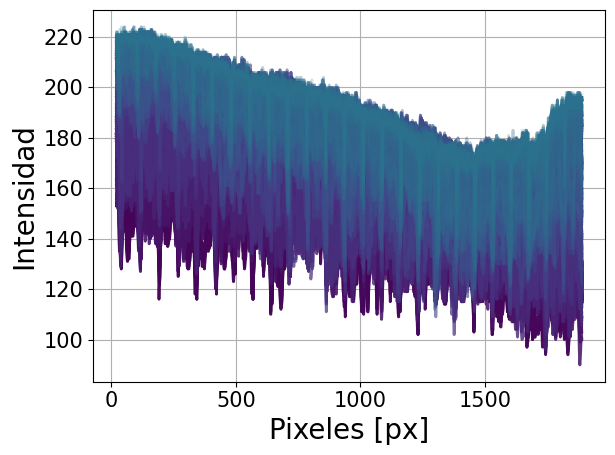

In [228]:
imagen = imageio.imread('images alambre/cropped/cal fuerza.png')[:,:,1]

imagen = np.hstack([imagen[:,:350],imagen[:,460:480],imagen[:,560:710],imagen[:,790:]])
print(imagen.shape)

dom = np.array(range(20,1890))
print(len(dom))
#plt.plot(dom,linea,'navy')

print(imagen.shape)
imagen = imagen[20:1890,40:760]
print(imagen.shape)

a = 1
for i in range(min(imagen.shape)):
    plt.plot(dom, imagen[:,i], c=plt.cm.viridis(i / len(imagen)), label=f'Fila {i}', alpha=a)
    a = a - 0.8/min(imagen.shape)

plt.xlabel('Pixeles [px]', fontsize='20')
plt.ylabel('Intensidad', fontsize='20')
#plt.xlim(30,40)
plt.grid()
plt.tight_layout()
plt.show()

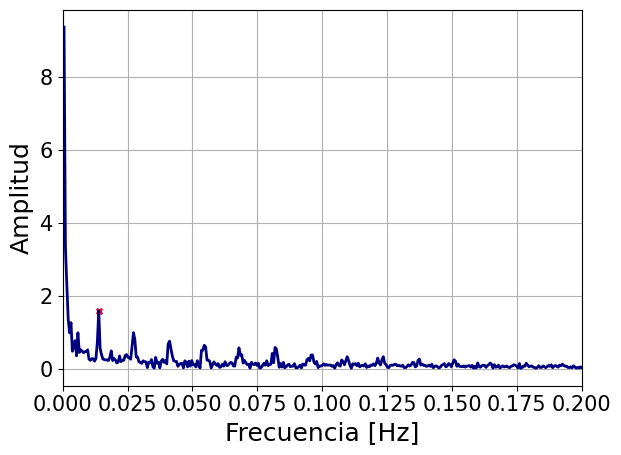

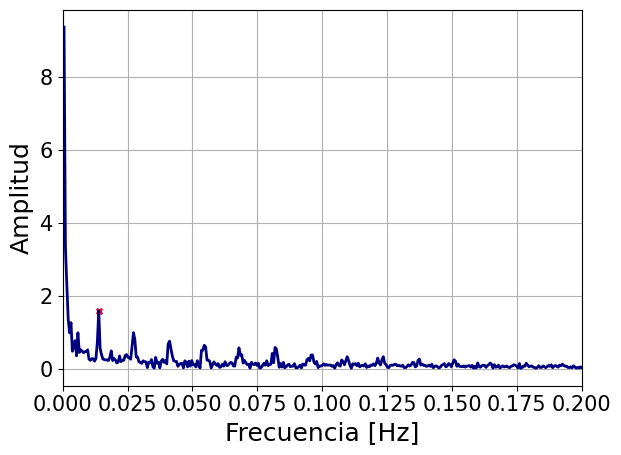

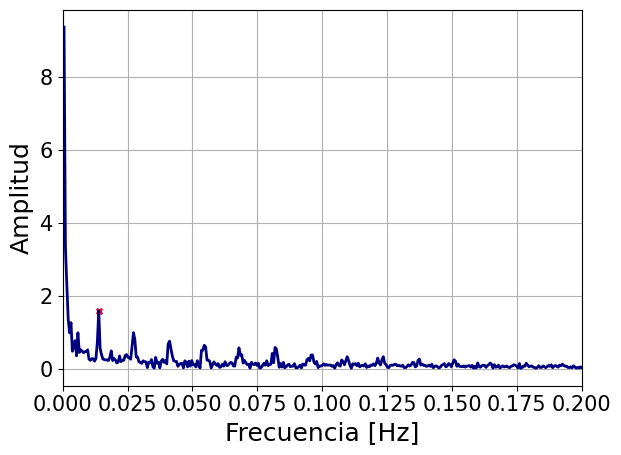

In [236]:
maximos = []
for i in range(3):
    imagen = imageio.imread('images alambre/cropped/cal fuerza.png')[:,:,i]
    imagen = np.hstack([imagen[:,:350],imagen[:,460:480],imagen[:,560:710],imagen[:,790:]])
    imagen = imagen[20:1890,40:760]
    
    frec, spec, picos = espectro(linea, 1.5,False,max(imagen.shape))
    plt.scatter(frec[picos], spec[picos], marker='x', c='crimson', zorder=2)
    plt.plot(frec, spec,'navy')
    maximos.append(frec[picos])
    
    plt.xlabel('Frecuencia [Hz]', fontsize=18)
    plt.ylabel('Amplitud', fontsize=18)
    plt.xlim(0,.2)
    plt.grid()
    plt.show()


In [240]:
1/maximos[0][0]

71.92307692307692

In [241]:
px_to_cm = lambda px : 71.92307692307692*px/2